In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("World University Rankings.csv")

In [9]:
df.head()

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,master_account,0,United Kingdom,"21,750",10.9,42%,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,98.5
1,Stanford University,99.0,97.8,99.6,100.0,87.0,private,0,United States,"14,517",6.4,23%,47:53:00,"Computer Science,Communication & Media Studies...",False,False,98
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,private,0,United States,"11,085",8.0,33%,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",False,False,97.9
3,Harvard University,97.7,99.9,99.4,84.2,90.8,private,0,United States,"20,050",9.0,25%,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,97.8
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,master_account,0,United Kingdom,"20,565",11.5,38%,48:52:00,Politics & International Studies (incl Develop...,False,False,97.5


In [10]:
df['stats_pc_intl_students'].unique()

array(['42%', '23%', '33%', '25%', '38%', '61%', '22%', '21%', '43%',
       '10%', '36%', '14%', '28%', '35%', '15%', '24%', '27%', '16%',
       '44%', '18%', '46%', '39%', '64%', '19%', '29%', '47%', '53%',
       '34%', '9%', '72%', '20%', '30%', '45%', '8%', '11%', '5%', '51%',
       '13%', '48%', '17%', '31%', '67%', '40%', '26%', '37%', '32%',
       '12%', '6%', '57%', '7%', '4%', '41%', '60%', '1%', '49%', '2%',
       '3%', '92%', '55%', '83%', '0%', '50%', '54%', '74%', '75%', '86%',
       '52%', '82%', '59%', '97%', '63%', '73%', '%', '90%', '96%', '69%',
       '70%', '56%', '91%', '88%', '100%', '80%', '58%', '85%'],
      dtype=object)

In [11]:
df['stats_pc_intl_students']=df['stats_pc_intl_students'].astype(str).str.replace('%','',regex=False).str.strip().replace(['','nan'],pd.NA)
df['stats_pc_intl_students'] = pd.to_numeric(df['stats_pc_intl_students'], errors='coerce')

In [12]:
df['stats_pc_intl_students'].unique()

array([ 42.,  23.,  33.,  25.,  38.,  61.,  22.,  21.,  43.,  10.,  36.,
        14.,  28.,  35.,  15.,  24.,  27.,  16.,  44.,  18.,  46.,  39.,
        64.,  19.,  29.,  47.,  53.,  34.,   9.,  72.,  20.,  30.,  45.,
         8.,  11.,   5.,  51.,  13.,  48.,  17.,  31.,  67.,  40.,  26.,
        37.,  32.,  12.,   6.,  57.,   7.,   4.,  41.,  60.,   1.,  49.,
         2.,   3.,  92.,  55.,  83.,   0.,  50.,  54.,  74.,  75.,  86.,
        52.,  82.,  59.,  97.,  63.,  73.,  nan,  90.,  96.,  69.,  70.,
        56.,  91.,  88., 100.,  80.,  58.,  85.])

In [13]:
ratios=df['stats_female_male_ratio'].str.split(':',expand=True)

In [14]:
ratios

,0,1,2
0,49,51,00
1,47,53,00
2,41,59,00
3,51,49,00
4,48,52,00
...,...,...,...
2668,60,40,00
2669,66,34,00
2670,40,60,None
2671,55,45,00


In [15]:
df['stats_female_ratio']=pd.to_numeric(ratios[0],errors='coerce')
df['stats_male_ratio']=pd.to_numeric(ratios[1],errors='coerce')

In [16]:
df['stats_female_ratio'].mean()


np.float64(50.72601771102209)

In [17]:
df.describe()


,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,member_level,stats_student_staff_ratio,stats_pc_intl_students,stats_female_ratio,stats_male_ratio
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,2673.000000,2673.000000,2670.000000,2580.000000,2486.000000
mean,29.060662,23.416176,52.189706,47.057405,49.907143,0.550318,19.130527,9.801873,50.726018,47.382944
std,13.967201,16.697923,25.071342,26.150454,21.828249,2.231166,13.450010,13.480099,15.829561,12.722474
min,9.400000,4.600000,3.400000,15.600000,16.100000,0.000000,0.300000,0.000000,0.069444,0.000000
25%,19.400000,11.800000,30.400000,22.275000,31.975000,0.000000,12.300000,1.000000,44.000000,40.000000
50%,25.800000,17.250000,52.400000,41.050000,45.300000,0.000000,16.600000,5.000000,53.000000,46.000000
75%,34.500000,29.900000,73.225000,68.200000,65.400000,0.000000,22.500000,13.000000,60.000000,55.000000
max,99.000000,100.000000,99.700000,100.000000,98.800000,11.000000,333.300000,100.000000,100.000000,76.000000


In [18]:
df

,name,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,record_type,member_level,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,subjects_offered,closed,unaccredited,overall_score,stats_female_ratio,stats_male_ratio
0,University of Oxford,96.6,100.0,99.0,98.7,97.5,master_account,0,United Kingdom,"21,750",10.9,42.0,49:51:00,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,98.5,49.0,51.0
1,Stanford University,99.0,97.8,99.6,100.0,87.0,private,0,United States,"14,517",6.4,23.0,47:53:00,"Computer Science,Communication & Media Studies...",False,False,98,47.0,53.0
2,Massachusetts Institute of Technology,98.6,96.2,99.7,100.0,93.8,private,0,United States,"11,085",8.0,33.0,41:59:00,"Architecture,Economics & Econometrics,Archaeol...",False,False,97.9,41.0,59.0
3,Harvard University,97.7,99.9,99.4,84.2,90.8,private,0,United States,"20,050",9.0,25.0,51:49:00,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,97.8,51.0,49.0
4,University of Cambridge,95.8,100.0,98.0,87.9,97.4,master_account,0,United Kingdom,"20,565",11.5,38.0,48:52:00,Politics & International Studies (incl Develop...,False,False,97.5,48.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,Zarqa University,NaN,NaN,NaN,NaN,NaN,master_account,0,Jordan,"5,881",17.0,35.0,60:40:00,"General Engineering,Civil Engineering,Electric...",False,False,NaN,60.0,40.0
2669,Zhetysu University,NaN,NaN,NaN,NaN,NaN,master_account,0,Kazakhstan,"4,872",18.2,0.0,66:34:00,"History, Philosophy & Theology,Psychology,Lang...",False,False,NaN,66.0,34.0
2670,Zhytomyr Polytechnic State University,NaN,NaN,NaN,NaN,NaN,master_account,0,Ukraine,"4,454",16.1,1.0,40 : 60,"Law,Economics & Econometrics,Politics & Intern...",False,False,NaN,40.0,60.0
2671,Ziane Achour University of Djelfa,NaN,NaN,NaN,NaN,NaN,master_account,0,Algeria,"31,103",28.5,0.0,55:45:00,"Architecture,Agriculture & Forestry,Biological...",False,False,NaN,55.0,45.0


In [19]:
df["overall_score"] = pd.to_numeric(df["overall_score"], errors="coerce")


In [20]:
print(df["overall_score"].dtype) 

float64


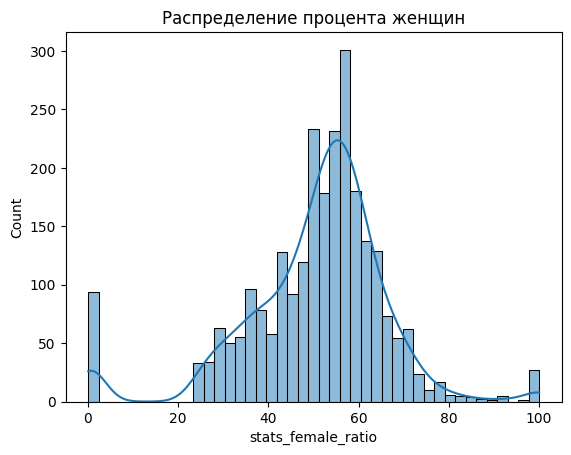

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
df_female = df[df['stats_female_ratio'].notna()]
sns.histplot(df_female['stats_female_ratio'], kde=True)
plt.title('Распределение процента женщин')
plt.show()


In [25]:
from scipy.stats import shapiro

stat, p = shapiro(df_female['stats_female_ratio'])
print(f'Шапиро-Уилк p-value: {p}')


Шапиро-Уилк p-value: 2.8458083738537154e-34


Нормальность не отвергается - можем использовать Пирсона

In [26]:
from scipy.stats import pearsonr

corr, pval = pearsonr(df_female['stats_female_ratio'], df_female['scores_teaching'])
print(f'Корреляция Пирсона с teaching: {corr:.3f}, p-value: {pval:.5f}')
corr, pval = pearsonr(df_female['stats_female_ratio'], df_female['scores_citations'])
print(f'Корреляция Пирсона с scores_citations: {corr:.3f}, p-value: {pval:.5f}')
corr, pval = pearsonr(df_female['stats_female_ratio'], df_female['scores_international_outlook'])
print(f'Корреляция Пирсона с scores_international_outlook: {corr:.3f}, p-value: {pval:.5f}')

Корреляция Пирсона с teaching: nan, p-value: nan
Корреляция Пирсона с scores_citations: nan, p-value: nan
Корреляция Пирсона с scores_international_outlook: nan, p-value: nan


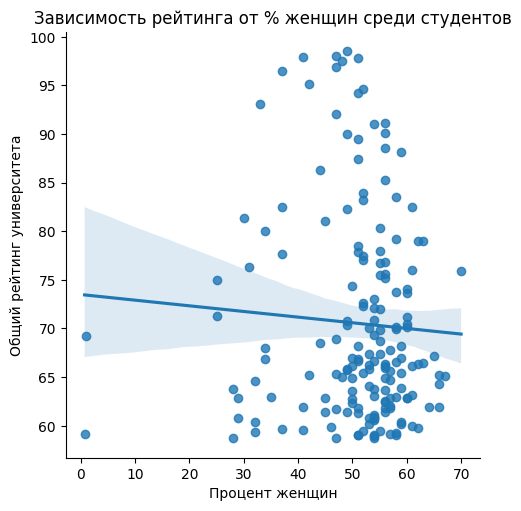

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="stats_female_ratio", y="overall_score", data=df)

plt.title("Зависимость рейтинга от % женщин среди студентов")
plt.xlabel("Процент женщин")
plt.ylabel("Общий рейтинг университета")
plt.show()



Никаких прямых корреляций между процентом женщин и достижениями университета не наблюдается.

Рассмотрим средние значения к примеру research score при разных показателях процента женщин 

In [28]:
high_female = df_female[df_female['stats_female_ratio'] > 55]
low_female = df_female[df_female['stats_female_ratio'] < 45]
print('Средний research score при >55% женщин:', high_female['scores_research'].mean())
print('Средний research score при <45% женщин:', low_female['scores_research'].mean())


Средний research score при >55% женщин: 22.4292817679558
Средний research score при <45% женщин: 21.37751091703057


In [29]:
from scipy.stats import shapiro


high_female = df_female[df_female['stats_female_ratio'] > 55]['scores_research'].dropna()
low_female = df_female[df_female['stats_female_ratio'] < 45]['scores_research'].dropna()

stat_high, p_high = shapiro(high_female)
stat_low, p_low = shapiro(low_female)

print(f'High female group ( >55% ): p-value = {p_high}')
print(f'Low female group  ( <45% ): p-value = {p_low}')


High female group ( >55% ): p-value = 4.753350737655357e-28
Low female group  ( <45% ): p-value = 1.6487258708672373e-26


Для обеих групп университетов p-value слишком маленькое по тесту Шапиро-Уилка, значит распределения ненормальны, что требовалось для использования здесь t-теста, так что используем непараметрический тест Манна-Уитни.

In [30]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(high_female, low_female, alternative='two-sided')
print(f'Mann-Whitney U-test p-value: {p}')


Mann-Whitney U-test p-value: 0.013922688939507199


Различие между группами статистически значимо, и наличие высокого процента женщин влияет на scores_research.

In [ ]:
!pip install plotly


Для начала, выдвенем гипотезу H0 - Чем меньше студентов приходится на одного сотрудника университета, тем выше уровень обучения, и наоборот. В качестве первичного анализа приведу 2 графика - скаттер плот со сглаживающей кривой и боксплот для оценки выбросов и медиан. При этом добавила очистку выбросов с помощью IQR правила.

In [31]:
Q1 = df['scores_teaching'].quantile(0.25)
Q3 = df['scores_teaching'].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df['scores_teaching'] >= Q1 - 1.5 * IQR) &
    (df['scores_teaching'] <= Q3 + 1.5 * IQR)
]


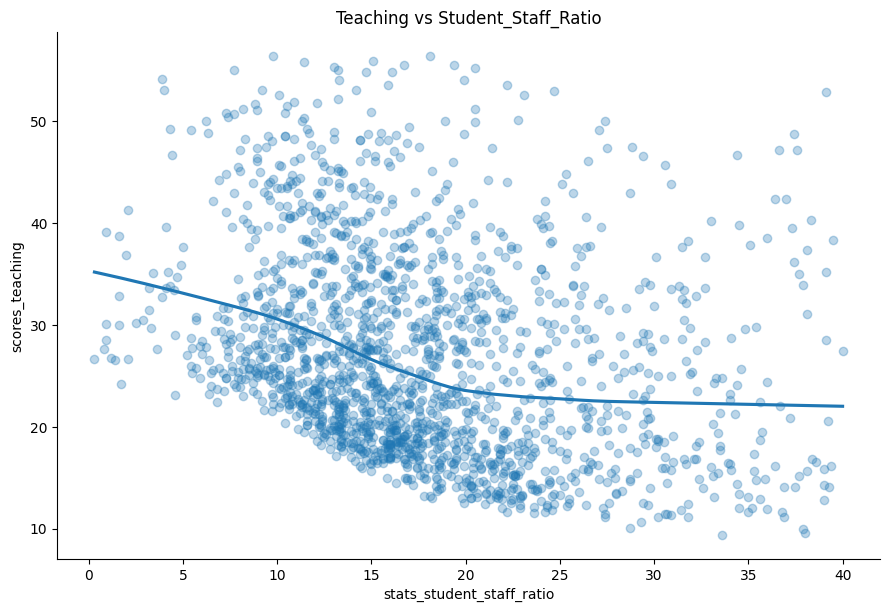

C:\Users\vilen\AppData\Local\Temp\ipykernel_42256\150831055.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratio_group'] = pd.cut(


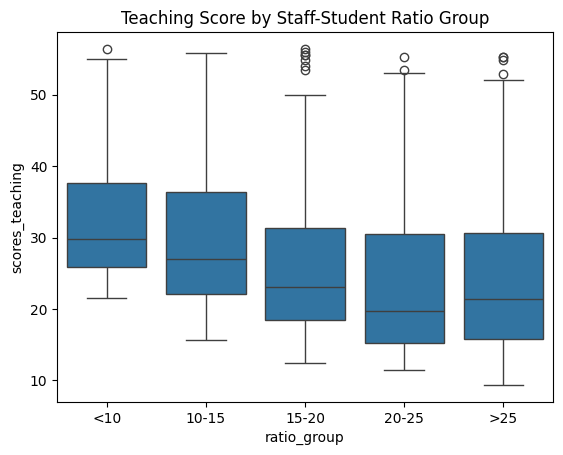

In [32]:

import seaborn as sns
import matplotlib.pyplot as plt
df_filtered = df[df['stats_student_staff_ratio'] <= 40]


sns.lmplot(
    data=df_filtered,
    x='stats_student_staff_ratio',
    y='scores_teaching',
    lowess=True,   
    scatter_kws={'alpha': 0.3}, 
    height=6,
    aspect=1.5
)
plt.title('Teaching vs Student_Staff_Ratio')
plt.show()


df['ratio_group'] = pd.cut(
    df['stats_student_staff_ratio'],
    bins=[0, 10, 15, 20, 25, 100],
    labels=['<10', '10-15', '15-20', '20-25', '>25']
)
sns.boxplot(
    data=df,
    x='ratio_group',
    y='scores_teaching'
)
plt.title('Teaching Score by Staff-Student Ratio Group')
plt.show()



Можно заметить, что и график, и медианы действительно располагаются в соответствии с выдвинутой ранее гипотезой, но нужно проверить статистическую значимость представленных различий в значениях.

Для начала, попробуем воспользоваться классическим методом дисперсионного анализа ANOVA - он работает, если:
 1) группы независимы
 2) распределения примерно нормальны
 3) дисперсии не сильно различаются 

In [33]:
#независимость - исключаем дубликаты, и понимаем, что каждый университет попал в свою группу и только один раз - следовательно, группы независимы
df.duplicated().sum()
#нормальность распределения - так как у нас здесь относительно небольшое количество наблюдений, используем тест Шапиро-Уилка и если p-value больше 0,05, то не отклоняем нормальность
from scipy.stats import shapiro, levene
results_normal={}
for name, grp in df.groupby('ratio_group')['scores_teaching']:
    stat,p=shapiro(grp)
    results_normal[name]=p
print('p-values Shap:', results_normal)
#примерное равенство дисперсий - можно взять тест Ливена, который устойчив к нормальности и проверить p-values
groups=[grp.dropna().values
        for i, grp in df.groupby('ratio_group')['scores_teaching']]
stat_lev,p_lev=levene(*groups,center='median')
print('Гомогенность дисперсий: ', p_lev)


p-values Shap: {'<10': np.float64(6.6574730431339215e-12), '10-15': np.float64(5.100982530133703e-15), '15-20': np.float64(2.6393673927297687e-16), '20-25': np.float64(8.765100553544268e-13), '>25': np.float64(8.261811872137712e-12)}
Гомогенность дисперсий:  0.013216733605984942


C:\Users\vilen\AppData\Local\Temp\ipykernel_42256\2958226438.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for name, grp in df.groupby('ratio_group')['scores_teaching']:
C:\Users\vilen\AppData\Local\Temp\ipykernel_42256\2958226438.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i, grp in df.groupby('ratio_group')['scores_teaching']]


После проведения анализа данных для подготовки к тесту ANOVA, видно, что в группах значения распределены не нормально и дисперсии значительно отличаются.
Используем непараметрический тест Крускаля- Валлиса, который сравнивает медианы между группами.

In [34]:
from scipy.stats import kruskal

stat_kw, p_kw = kruskal(*groups)
print(f"Kruskal–Wallis H = {stat_kw:.3f}, p = {p_kw:.5f}")


Kruskal–Wallis H = 223.583, p = 0.00000


In [ ]:
!pip install pingouin

In [35]:
import pingouin as pg  

# Dunn или Games–Howell 
results = pg.pairwise_gameshowell(
    dv='scores_teaching',
    between='ratio_group',
    data=df
)
print(results)


       A      B    mean(A)    mean(B)      diff        se          T  \
0    <10  10-15  32.579343  29.532821  3.046521  0.709214   4.295632   
1    <10  15-20  32.579343  25.685565  6.893778  0.716655   9.619378   
2    <10  20-25  32.579343  23.206522  9.372821  0.825564  11.353240   
3    <10    >25  32.579343  24.164615  8.414727  0.822907  10.225617   
4  10-15  15-20  29.532821  25.685565  3.847257  0.584991   6.576603   
5  10-15  20-25  29.532821  23.206522  6.326300  0.714266   8.857068   
6  10-15    >25  29.532821  24.164615  5.368206  0.711193   7.548171   
7  15-20  20-25  25.685565  23.206522  2.479043  0.721655   3.435219   
8  15-20    >25  25.685565  24.164615  1.520949  0.718614   2.116504   
9  20-25    >25  23.206522  24.164615 -0.958094  0.827264  -1.158147   

           df          pval    hedges  
0  429.422298  2.085244e-04  0.335749  
1  438.517536  1.015854e-13  0.767621  
2  480.107294  1.204592e-13  1.015442  
3  513.479006  1.670886e-13  0.861219  
4  991.

Здесь наблюдаем, что группы значительно различаются в 9 из 10 столбцах - следовательно есть статистически значимые различия и мы можем принять гипотезу H0.

Еще хотелось бы рассмотреть вопрос "цены" интернациональности - корреляции между ключевыми связанными с темой показателями, для этого используем тепловую карту зависимостей. Рассмотрим изначально по Пирсону, а дальше возьмем те показатели, где корреляция существенна и выясним, можно ли полагаться на этот результат.

<Axes: >

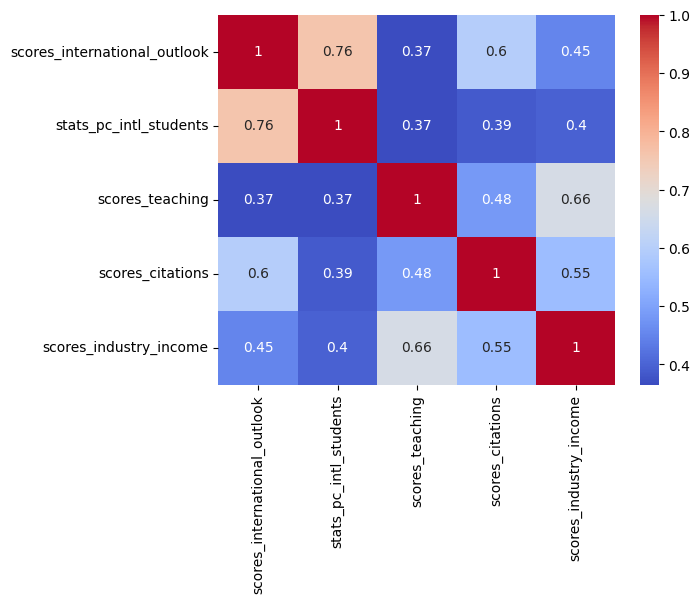

In [36]:
cols = ['scores_international_outlook', 'stats_pc_intl_students',
        'scores_teaching', 'scores_citations', 'scores_industry_income']
df_corr = df[cols].corr(method='pearson')

import seaborn as sns
sns.heatmap(df_corr, annot=True, cmap='coolwarm')


Существенная корреляция наблюдается между цитированием и интернациональными перспективами - рассмотрим, можно ли полагаться здесь на Пирсона, для этого необходимо проверить:

1) Количественность переменных (выполнено по умолчанию)
2) Линейная связь
3) Нет сильных выбросов 
4) Нормальность распределения переменных

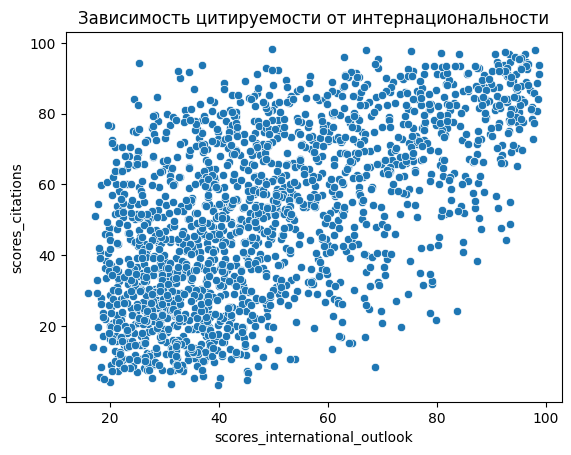

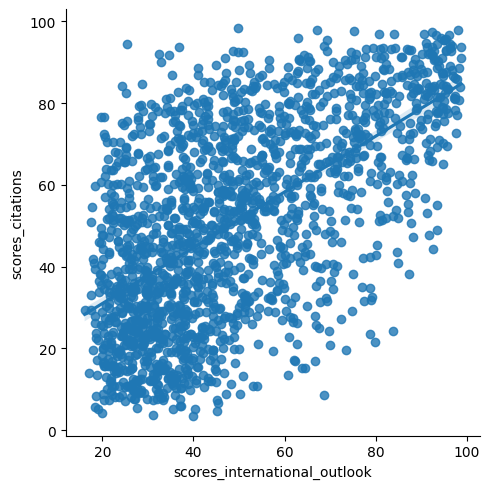

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='scores_international_outlook', y='scores_citations')
plt.title('Зависимость цитируемости от интернациональности')
plt.show()
sns.lmplot(data=df, x='scores_international_outlook', y='scores_citations')


Линейность заметна - есть воазрастающая тенденция, при этом при international_outlook > 80 практически нет низкой цитируемости, что говорит об устойчивости.

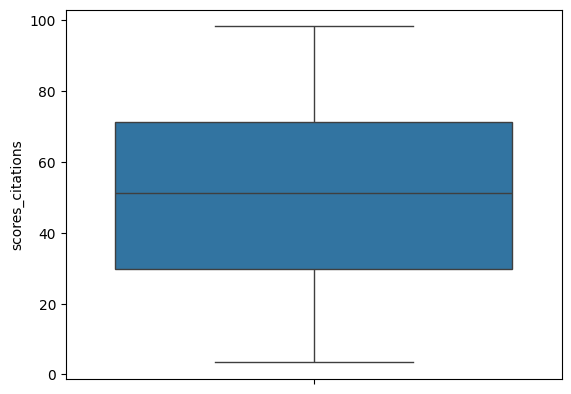

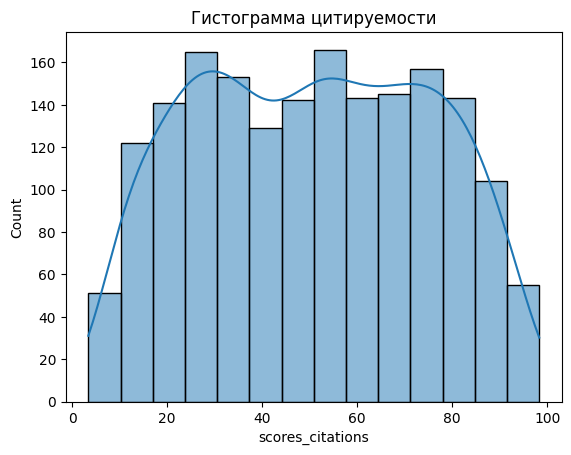

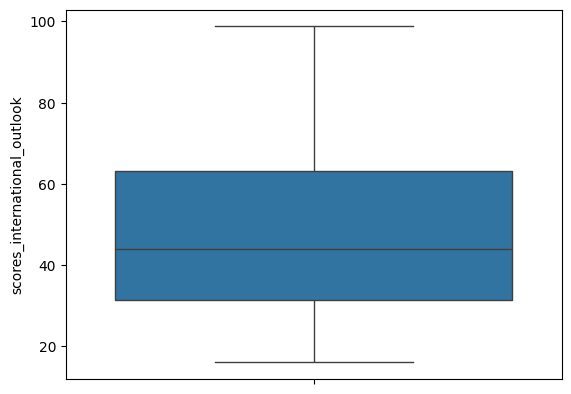

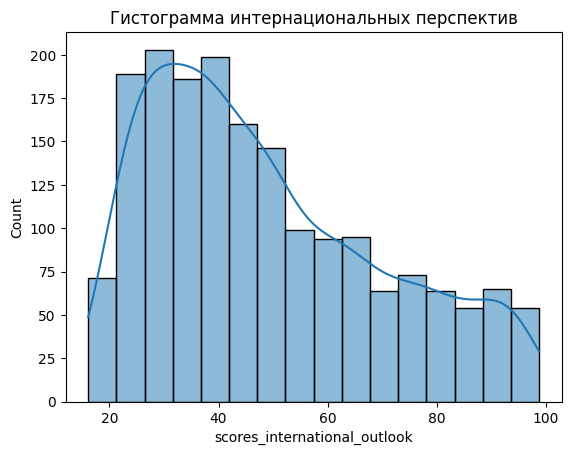

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='scores_citations',data=df,showfliers=True)
plt.show()
sns.histplot(df['scores_citations'], kde=True)
plt.title('Гистограмма цитируемости')
plt.show()
sns.boxplot(y='scores_international_outlook',data=df,showfliers=True)
plt.show()
sns.histplot(df['scores_international_outlook'], kde=True)
plt.title('Гистограмма интернациональных перспектив')
plt.show()


Цитируемость распределена примерно нормально, но есть некотореы выбросы, при этом интернцаольные перспективы распредлены ненормально с сильным перекосом влево. однако не имеют существенных выбросов. Я бы сказала, что несмотря на отклонение от нормального распределения при больших выборках можно использовать распределение Пирсона, ведь при увеличении n, увеличивается его устойчивость к нормальности. Можно однако попробовать использовать непараметрическую корреляцию Спирмана, которая не требует нормального распределения и отсутствия выбросов.

In [39]:
from scipy.stats import spearmanr
corr,p = spearmanr(df['scores_citations'],df['scores_international_outlook'])
print(f"Spearman correlation: {corr:.3f},p-value:{p:.5f}")

Spearman correlation: 0.583,p-value:0.00000


Как мы видим, корреляция все еще довольно сильная. Следовательно можно принять гипотезу о том, что чем выше международные перспективы, тем выше цитируемость университета.

Интересно было бы посмотреть на Гео-карту университетов по overall_score и постараться отследить зависимости.

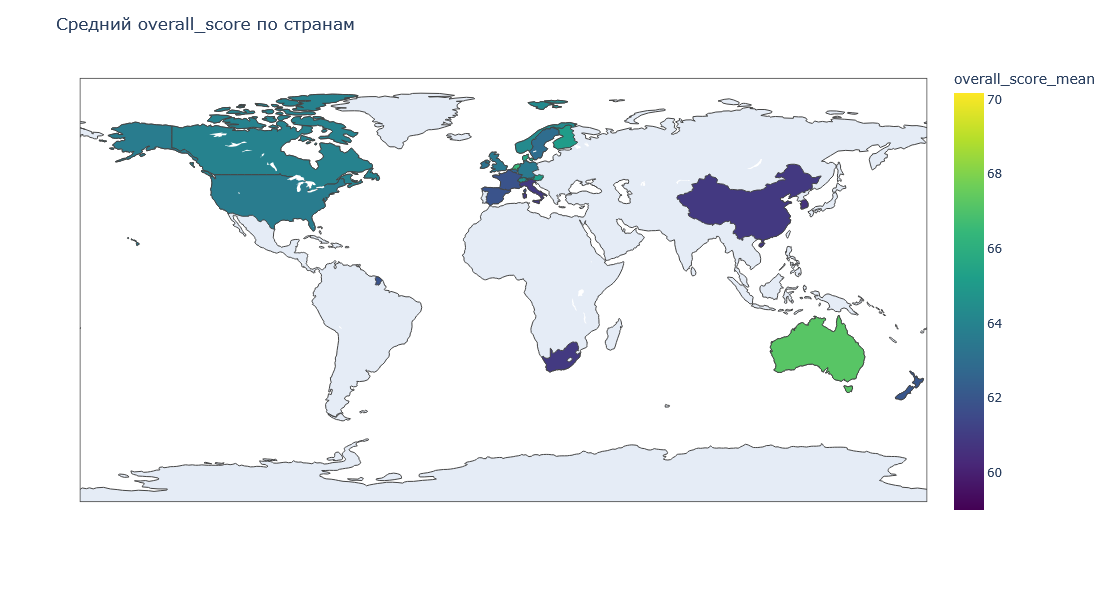

In [47]:
import plotly.express as px

import pandas as pd


agg = (df.groupby("location", as_index=False)
         .agg(overall_score_mean=("overall_score", "mean"),
              n_universities=("name", "count")))



fig = px.choropleth(
    agg,
    locations="location",
    locationmode="country names",
    color="overall_score_mean",
    hover_name="location",
    hover_data={"overall_score_mean":":.2f", "n_universities": True},
    color_continuous_scale="Viridis"
)

fig.update_layout(width=1200, height=600, title="Средний overall_score по странам")
fig.show()
